<a href="https://colab.research.google.com/github/mzolneczko/DSP_lab3_20251213/blob/main/DSP_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

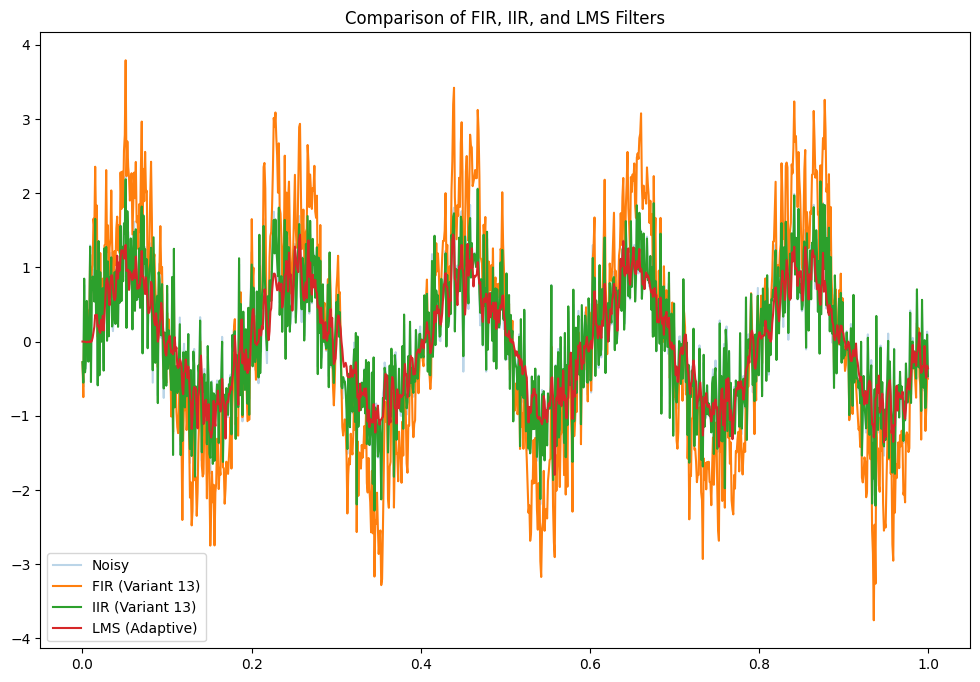

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def fir_filter(x, b):
    M = len(b)
    x_padded = np.concatenate((np.zeros(M-1), x))
    y = np.zeros(len(x))
    for n in range(len(x)):
        x_segment = x_padded[n : n + M][::-1]
        y[n] = np.dot(b, x_segment)
    return y

def iir_filter(x, b, a):
    M = len(b)
    N = len(a)
    x_padded = np.concatenate((np.zeros(M-1), x))
    y = np.zeros(len(x))
    y_padded = np.zeros(len(x) + N - 1)

    for n in range(len(x)):
        x_segment = x_padded[n : n + M][::-1]
        val = np.dot(b, x_segment)

        y_feedback = y_padded[n : n + N - 1][::-1]
        val -= np.dot(a[1:], y_feedback)

        y[n] = val
        y_padded[n + N - 1] = val
    return y

def lms_filter(x, d, mu, num_taps):
    n = len(x)
    w = np.zeros(num_taps)
    y = np.zeros(n)
    e = np.zeros(n)
    x_padded = np.concatenate((np.zeros(num_taps-1), x))

    for i in range(n):
        x_segment = x_padded[i : i + num_taps][::-1]
        y[i] = np.dot(w, x_segment)
        e[i] = d[i] - y[i]
        w += mu * e[i] * x_segment

    return y, e, w

fs = 1000
t = np.linspace(0, 1, fs)
desired_signal = np.sin(2 * np.pi * 5 * t)
noisy_signal = desired_signal + 0.5 * np.random.randn(len(t))

b_fir = np.array([1, 0.5, 0.5])
b_iir = np.array([1, -0.5, 0.2])
a_iir = np.array([1, -0.3])
mu_lms = 0.1
m_lms = 4

y_fir = fir_filter(noisy_signal, b_fir)
y_iir = iir_filter(noisy_signal, b_iir, a_iir)
y_lms, _, _ = lms_filter(noisy_signal, desired_signal, mu_lms, m_lms)

plt.figure(figsize=(12, 8))
plt.plot(t, noisy_signal, label="Noisy", alpha=0.3)
plt.plot(t, y_fir, label="FIR (Variant 13)")
plt.plot(t, y_iir, label="IIR (Variant 13)")
plt.plot(t, y_lms, label="LMS (Adaptive)")
plt.legend()
plt.title("Comparison of FIR, IIR, and LMS Filters")
plt.show()